# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

basic_data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')

basic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
basic_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Предложенные для анализа данные имеют следующие харакетиристики: количество столбцов - 22, количество строк -23699.
Структура данных: 14 колонок с дробными числами (тип данных float64), 3 колонки с текстовыми данными, 3 с вещественными числами, 2 с логическим (булев) тип данных. 
в 14 колонках при первичной оценке данных идентифицированы отсутсвующие значения (по количеству строк).
нулевые значения не выявлены ни в одном столбце (non-null)
is_apartment;parks_nearest;ponds_nearest;balcony;ceiling_height;airports_nearest;cityCenters_nearest;parks_around3000;ponds_around3000;days_exposition;kitchen_area;living_area;floors_total;locality_name


### Шаг 2. Предобработка данных

In [3]:
#общий алгоритм действий для каждого столбца будет одинаковым: считаем количество значений, спользуя метод .value_counts,
#далее выявляем пропуски и ищем оптимальный способ их заполнения.

basic_data['total_images'].value_counts()





10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64

In [4]:
basic_data[basic_data['total_images'].isnull()].count()

#в колонке total_images пропущенные значение не выявлены

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [5]:
basic_data['last_price'].value_counts()



4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
4412094.0       1
6416000.0       1
4581000.0       1
34551000.0      1
6029433.0       1
Name: last_price, Length: 2978, dtype: int64

In [6]:
basic_data[basic_data['last_price'].isnull()].count()

#в колонке last_price пропущенные значение не выявлены

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [7]:
basic_data['total_area'].value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64

In [8]:
basic_data[basic_data['total_area'].isnull()].count()

#в колонке total_area пропущенные значение не выявлены

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [9]:
basic_data['first_day_exposition'].value_counts()


2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2015-05-17T00:00:00      1
2015-09-17T00:00:00      1
2015-09-23T00:00:00      1
2017-02-25T00:00:00      1
2015-05-30T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

In [10]:
basic_data[basic_data['first_day_exposition'].isnull()].count()

#в колонке first_day_exposition пропущенные значение не выявлены

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [11]:
basic_data.groupby('rooms').agg({'last_price':'count'})

#по сути, метод value_counts() заменили на группировку, чтоы данные были упорядочены 
#в колонке rooms пропущенные значение не выявлены

,last_price
rooms,
0,197
1,8047
2,7940
3,5814
4,1180
5,326
6,105
7,59
8,12


In [12]:
#смущают квартиры с компатами в количестве 0, сделаем допущение, что это студии (проверим это по площади таких помещений)

basic_data.query('rooms ==0')[['is_apartment', 'studio','open_plan','last_price','total_area']].describe()


,last_price,total_area
count,1.970000e+02,197.000000
mean,3.337724e+06,29.279746
std,5.046022e+06,25.855264
min,9.457500e+05,15.500000
25%,2.300000e+06,24.050000
50%,2.700000e+06,26.050000
75%,3.380000e+06,28.400000
max,7.100000e+07,371.000000


In [13]:
#75% в такой выборке - имеют площадь менее 30м2.
#все заменим на 1
#проверим, что замена произведена успешно
#в реальной жизни такая замена была бы излишней, так как обьем выборки по ним слишком мал
# их можно удалить из исходных данных 


basic_data.loc[basic_data['rooms'] ==0]=1

basic_data.groupby('rooms').agg({'last_price':'count'})

,last_price
rooms,
1,8244
2,7940
3,5814
4,1180
5,326
6,105
7,59
8,12
9,8


In [14]:
basic_data[basic_data['floors_total'].isnull()].count() #заменим наши пропуски нулевыми значениями, так как иного логически обоснованного спосоа их замены нет (дома могут быть разного года постройки и т.д.)

total_images            83
last_price              83
total_area              83
first_day_exposition    83
rooms                   83
ceiling_height           9
floors_total             0
living_area             53
floor                   83
is_apartment             0
studio                  83
open_plan               83
kitchen_area            39
balcony                 47
locality_name           82
airports_nearest        75
cityCenters_nearest     75
parks_around3000        75
parks_nearest           33
ponds_around3000        75
ponds_nearest           48
days_exposition         74
dtype: int64

In [15]:
basic_data['floors_total'] = basic_data['floors_total'].fillna(value = 0)

In [16]:
basic_data[basic_data['floors_total'].isnull()].count() #проверим успешность замены 

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [17]:
basic_data[basic_data['living_area'].isnull()].count() #заполним эти пропуски

total_images            1889
last_price              1889
total_area              1889
first_day_exposition    1889
rooms                   1889
ceiling_height           792
floors_total            1889
living_area                0
floor                   1889
is_apartment             120
studio                  1889
open_plan               1889
kitchen_area             439
balcony                  495
locality_name           1884
airports_nearest        1270
cityCenters_nearest     1272
parks_around3000        1272
parks_nearest            574
ponds_around3000        1272
ponds_nearest            687
days_exposition         1693
dtype: int64

In [18]:
#для этого столбца заменим пропуски на медианное значение по квартирам со сопоставимым числом комнат
#создаем таблицу-справочник
basic_data['living_area_upd'] = basic_data['living_area']

for rooms in basic_data['rooms'].unique():
    med_living_area = basic_data[basic_data['rooms'] == rooms]['living_area'].median()
    basic_data.loc[(basic_data['living_area_upd'].isna()) & (basic_data['rooms'] == rooms), 'living_area_upd'] = med_living_area




In [19]:
basic_data[basic_data['living_area_upd'].isnull()].count() #проверим успешность замены

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
living_area_upd         0
dtype: int64

In [20]:
basic_data['floor'].value_counts()

2     3346
1     3096
3     3061
4     2791
5     2610
6     1291
7     1202
8     1076
9     1040
10     679
12     520
11     516
13     370
15     339
14     333
16     308
17     218
18     176
19     143
21     123
20     109
22     109
23      98
24      61
25      45
26      23
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64

In [21]:
basic_data[basic_data['floor'].isnull()].count() #в колонке пропущенные значение не выявлены

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
living_area_upd         0
dtype: int64

In [22]:
basic_data[basic_data['is_apartment'].isnull()].count() #заменим пропуски на 0, сделав допущение, что жилая недвижимость, как правило, не паратаменты

total_images            20733
last_price              20733
total_area              20733
first_day_exposition    20733
rooms                   20733
ceiling_height          12564
floors_total            20733
living_area             18964
floor                   20733
is_apartment                0
studio                  20733
open_plan               20733
kitchen_area            18836
balcony                  9761
locality_name           20699
airports_nearest        15897
cityCenters_nearest     15917
parks_around3000        15918
parks_nearest            7104
ponds_around3000        15918
ponds_nearest            7966
days_exposition         17841
living_area_upd         20733
dtype: int64

In [23]:
basic_data['is_apartment'] = basic_data['is_apartment'].fillna( value = False)


In [24]:
basic_data[basic_data['is_apartment'].isnull()].count() #проверяем удачность замены

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
living_area_upd         0
dtype: int64

In [25]:
basic_data[basic_data['studio'].isnull()].count() #в колонке пропущенные значение не выявлены

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
living_area_upd         0
dtype: int64

In [26]:
basic_data[basic_data['open_plan'].isnull()].count() #в колонке пропущенные значение не выявлены

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
living_area_upd         0
dtype: int64

In [27]:
basic_data[basic_data['kitchen_area'].isnull()].count() #заменим по аналогии с колонкой living_area

total_images            2081
last_price              2081
total_area              2081
first_day_exposition    2081
rooms                   2081
ceiling_height           858
floors_total            2081
living_area              631
floor                   2081
is_apartment            2081
studio                  2081
open_plan               2081
kitchen_area               0
balcony                  603
locality_name           2072
airports_nearest        1443
cityCenters_nearest     1445
parks_around3000        1445
parks_nearest            661
ponds_around3000        1445
ponds_nearest            775
days_exposition         1892
living_area_upd         2081
dtype: int64

In [28]:
basic_data['kitchen_area_upd'] = basic_data['kitchen_area']

for rooms in basic_data['rooms'].unique():
    med_kitchen_area = basic_data[basic_data['rooms'] == rooms]['kitchen_area'].median()
    basic_data.loc[(basic_data['kitchen_area_upd'].isna()) & (basic_data['rooms'] == rooms), 'kitchen_area_upd'] = med_kitchen_area



In [29]:
basic_data[basic_data['kitchen_area_upd'].isnull()].count() #проверим успешность замены

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
living_area_upd         0
kitchen_area_upd        0
dtype: int64

In [30]:
basic_data['balcony'].value_counts()

1.0    4363
0.0    3746
2.0    3574
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [31]:
basic_data[basic_data['balcony'].isnull()].count() #заменим пропуски нулями, сделав допущение, что пропущенное значение оставлялось в случае отсуствия балкона

total_images            11448
last_price              11448
total_area              11448
first_day_exposition    11448
rooms                   11448
ceiling_height           7213
floors_total            11448
living_area             10054
floor                   11448
is_apartment            11448
studio                  11448
open_plan               11448
kitchen_area             9970
balcony                     0
locality_name           11442
airports_nearest         8756
cityCenters_nearest      8763
parks_around3000         8763
parks_nearest            4104
ponds_around3000         8763
ponds_nearest            4504
days_exposition          9345
living_area_upd         11448
kitchen_area_upd        11448
dtype: int64

In [32]:
basic_data['balcony'] = basic_data['balcony'].fillna(value = 0)

In [33]:
basic_data[basic_data['balcony'].isnull()].count() #проверяем удачность замены

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
living_area_upd         0
kitchen_area_upd        0
dtype: int64

In [34]:
basic_data['balcony'].value_counts()

0.0    15194
1.0     4363
2.0     3574
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [35]:
basic_data[basic_data['locality_name'].isnull()].count() #заменим пропуски на произвольное значение "прочие", т.к. в данном случае другого логически обоснованного варианта замены нет

total_images            49
last_price              49
total_area              49
first_day_exposition    49
rooms                   49
ceiling_height          14
floors_total            49
living_area             44
floor                   49
is_apartment            49
studio                  49
open_plan               49
kitchen_area            40
balcony                 49
locality_name            0
airports_nearest        41
cityCenters_nearest     41
parks_around3000        41
parks_nearest           15
ponds_around3000        41
ponds_nearest           25
days_exposition         48
living_area_upd         49
kitchen_area_upd        49
dtype: int64

In [36]:
basic_data['is_apartment'] = basic_data['is_apartment'].fillna( value = "Прочие")

In [37]:
basic_data[basic_data['locality_name'].isnull()].count() #проверяем удачность замены

total_images            49
last_price              49
total_area              49
first_day_exposition    49
rooms                   49
ceiling_height          14
floors_total            49
living_area             44
floor                   49
is_apartment            49
studio                  49
open_plan               49
kitchen_area            40
balcony                 49
locality_name            0
airports_nearest        41
cityCenters_nearest     41
parks_around3000        41
parks_nearest           15
ponds_around3000        41
ponds_nearest           25
days_exposition         48
living_area_upd         49
kitchen_area_upd        49
dtype: int64

In [38]:
basic_data['ceiling_height'].value_counts()

2.50      3513
2.60      1637
2.70      1552
3.00      1109
2.80       979
          ... 
4.15         1
2.34         1
100.00       1
3.59         1
22.60        1
Name: ceiling_height, Length: 182, dtype: int64

In [39]:
basic_data[basic_data['ceiling_height'].isnull()].count()
#а вот и пустые строки - заполним их
# для заполнения таких пропусков подойдет медианное значение высоты потолков но, не общее,а по удаленности от центра 
#(по идее этим действием мы ранжируем категории по классу - элитное (центр) и т.д. - т.к. очевидно, что высота потолка юудет разной)
#выделим три категории: центр (удаленность до 5км),жилой район (спальный, 5-10км) и периферия (свыше 10 км.,окраина)
#присвоение произведем через метод loc в цикле

total_images            9080
last_price              9080
total_area              9080
first_day_exposition    9080
rooms                   9080
ceiling_height             0
floors_total            9080
living_area             7983
floor                   9080
is_apartment            9080
studio                  9080
open_plan               9080
kitchen_area            7857
balcony                 9080
locality_name           9045
airports_nearest        6556
cityCenters_nearest     6559
parks_around3000        6559
parks_nearest           2771
ponds_around3000        6559
ponds_nearest           3339
days_exposition         8358
living_area_upd         9080
kitchen_area_upd        9080
dtype: int64

In [40]:
basic_data_1 = basic_data.copy() #делаем копию нашего 
#исходного дата фрейма (чтобы оставить его без измнений)
basic_data_1['locality_type'] = 'Область' #делим населенные пункты на два подмножества - город и область,
#добавим новый столбец
#произведем группировку по удаленности от центра
basic_data_1.loc[(basic_data['locality_name'] == "Санкт-Петербург") & (basic_data['cityCenters_nearest'] > 10000), 'locality_type'] ='Перифирия'
basic_data_1.loc[(basic_data['locality_name'] == "Санкт-Петербург") & (basic_data['cityCenters_nearest'] <= 10000), 'locality_type'] ='Жилой район'
basic_data_1.loc[(basic_data['locality_name'] == "Санкт-Петербург") & (basic_data['cityCenters_nearest'] <= 5000), 'locality_type'] ='Центр'

median = basic_data_1.groupby(['locality_type']).agg({'ceiling_height': 'median',
                                                           'locality_name': 'count'}) #посчитаем медиану по каждой группе и оценим равномерность (по количеству) и репрезентативность выборки по каждой группе

basic_data_1['ceiling_height_upd'] = basic_data_1['ceiling_height']
for type in basic_data_1['locality_type'].unique():
    basic_data_1.loc[(basic_data_1['ceiling_height'].isna()) & (basic_data_1['locality_type'] == type),'ceiling_height_upd'] = median[median.index == type]['ceiling_height'][0]
    


#basic_data_1['locality_type'].value_counts() #проверяем репрезентативность выборки

basic_data_1




,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_upd,kitchen_area_upd,locality_type,ceiling_height_upd
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,51.0,25.00,Перифирия,2.70
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,18.6,11.00,Область,2.60
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,34.3,8.30,Перифирия,2.60
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,45.0,9.50,Жилой район,2.80
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,32.0,41.00,Жилой район,3.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,4232.0,1.0,796.0,3.0,381.0,NaN,73.3,13.83,Центр,3.70
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,NaN,NaN,45.0,38.0,8.50,Область,2.60
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,29.7,8.80,Область,2.60
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,False,...,10364.0,2.0,173.0,3.0,196.0,602.0,30.5,23.30,Перифирия,3.00


In [41]:
basic_data_1[basic_data_1['ceiling_height_upd'].isnull()].count() #проверим, что замена в копии исходных данных прошла успешно прошла успешноg

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
living_area_upd         0
kitchen_area_upd        0
locality_type           0
ceiling_height_upd      0
dtype: int64

In [42]:
basic_data_1[basic_data_1['airports_nearest'].isnull()].count() #произведем замену пропусков, исходя из местоположения населенного пункта (по аналогии с предыдущей заменой для ceiling_height)

total_images            5463
last_price              5463
total_area              5463
first_day_exposition    5463
rooms                   5463
ceiling_height          2939
floors_total            5463
living_area             4844
floor                   5463
is_apartment            5463
studio                  5463
open_plan               5463
kitchen_area            4825
balcony                 5463
locality_name           5455
airports_nearest           0
cityCenters_nearest       24
parks_around3000          24
parks_nearest             20
ponds_around3000          24
ponds_nearest              8
days_exposition         4602
living_area_upd         5463
kitchen_area_upd        5463
locality_type           5463
ceiling_height_upd      5463
dtype: int64

In [43]:
basic_data_1['location'] = 'Область' #делим населенные пункты на два подмножества - город и область,
#добавим новый столбец
#произведем группировку по удаленности от центра
basic_data_1.loc[(basic_data['locality_name'] == "Санкт-Петербург") , 'location'] ='Город'

median = basic_data_1.groupby(['location']).agg({'airports_nearest': 'median',
                                                           'locality_name': 'count'}) #посчитаем медиану по каждой локации

basic_data_1['airports_nearest_upd'] = basic_data_1['airports_nearest']
for type in basic_data_1['location'].unique():
    basic_data_1.loc[(basic_data_1['airports_nearest'].isna()) & (basic_data_1['location'] == type),'airports_nearest_upd'] = median[median.index == type]['airports_nearest'][0]
    

basic_data_1

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_upd,kitchen_area_upd,locality_type,ceiling_height_upd,location,airports_nearest_upd
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,51.0,25.00,Перифирия,2.70,Город,18863.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,18.6,11.00,Область,2.60,Область,12817.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,34.3,8.30,Перифирия,2.60,Город,21741.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,45.0,9.50,Жилой район,2.80,Город,28098.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,32.0,41.00,Жилой район,3.03,Город,31856.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,796.0,3.0,381.0,NaN,73.3,13.83,Центр,3.70,Город,24665.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,45.0,38.0,8.50,Область,2.60,Область,25994.5
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,29.7,8.80,Область,2.60,Область,25994.5
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,False,...,173.0,3.0,196.0,602.0,30.5,23.30,Перифирия,3.00,Город,39140.0


In [44]:
basic_data_1[basic_data_1['airports_nearest_upd'].isnull()].count() #проверяем

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
living_area_upd         0
kitchen_area_upd        0
locality_type           0
ceiling_height_upd      0
location                0
airports_nearest_upd    0
dtype: int64

In [45]:
basic_data_1[basic_data_1['cityCenters_nearest'].isnull()].count() #произведем замену, исходя из удаленности от центра

total_images            5440
last_price              5440
total_area              5440
first_day_exposition    5440
rooms                   5440
ceiling_height          2919
floors_total            5440
living_area             4823
floor                   5440
is_apartment            5440
studio                  5440
open_plan               5440
kitchen_area            4804
balcony                 5440
locality_name           5432
airports_nearest           1
cityCenters_nearest        0
parks_around3000           1
parks_nearest              1
ponds_around3000           1
ponds_nearest              0
days_exposition         4580
living_area_upd         5440
kitchen_area_upd        5440
locality_type           5440
ceiling_height_upd      5440
location                5440
airports_nearest_upd    5440
dtype: int64

In [46]:
median = basic_data_1.groupby(['locality_type']).agg({'cityCenters_nearest': 'median',
                                                           'locality_name': 'count'}) #посчитаем медиану по каждой группе и оценим равномерность (по количеству) и репрезентативность выборки по каждой группе

basic_data_1['cityCenters_nearest_upd'] = basic_data_1['cityCenters_nearest']
for type in basic_data_1['locality_type'].unique():
    basic_data_1.loc[(basic_data_1['cityCenters_nearest'].isna()) & (basic_data_1['locality_type'] == type),'cityCenters_nearest_upd'] = median[median.index == type]['cityCenters_nearest'][0]
    

basic_data_1


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_area_upd,kitchen_area_upd,locality_type,ceiling_height_upd,location,airports_nearest_upd,cityCenters_nearest_upd
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,51.0,25.00,Перифирия,2.70,Город,18863.0,16028.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,18.6,11.00,Область,2.60,Область,12817.0,18603.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,34.3,8.30,Перифирия,2.60,Город,21741.0,13933.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,45.0,9.50,Жилой район,2.80,Город,28098.0,6800.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,32.0,41.00,Жилой район,3.03,Город,31856.0,8098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,3.0,381.0,NaN,73.3,13.83,Центр,3.70,Город,24665.0,4232.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,...,NaN,NaN,45.0,38.0,8.50,Область,2.60,Область,25994.5,29847.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,29.7,8.80,Область,2.60,Область,25994.5,29847.0
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,False,...,3.0,196.0,602.0,30.5,23.30,Перифирия,3.00,Город,39140.0,10364.0


In [47]:
basic_data_1[basic_data_1['cityCenters_nearest_upd'].isnull()].count()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
living_area_upd            0
kitchen_area_upd           0
locality_type              0
ceiling_height_upd         0
location                   0
airports_nearest_upd       0
cityCenters_nearest_upd    0
dtype: int64

In [48]:
basic_data_1[basic_data_1['days_exposition'].isnull()].count() #пропущенные значение заменим на 0. В связи с тем, что мы ничего не знаем о статусе объявления, другого логически обоснованного и подходящего метода в данном конкретном случае нет

total_images               3167
last_price                 3167
total_area                 3167
first_day_exposition       3167
rooms                      3167
ceiling_height             2445
floors_total               3167
living_area                2971
floor                      3167
is_apartment               3167
studio                     3167
open_plan                  3167
kitchen_area               2978
balcony                    3167
locality_name              3166
airports_nearest           2306
cityCenters_nearest        2307
parks_around3000           2308
parks_nearest              1142
ponds_around3000           2308
ponds_nearest              1211
days_exposition               0
living_area_upd            3167
kitchen_area_upd           3167
locality_type              3167
ceiling_height_upd         3167
location                   3167
airports_nearest_upd       3167
cityCenters_nearest_upd    3167
dtype: int64

In [49]:
basic_data_1['days_exposition'] = basic_data_1['days_exposition'].fillna(value = 0)

In [50]:
basic_data_1[basic_data_1['days_exposition'].isnull()].count() #проверяем

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
living_area_upd            0
kitchen_area_upd           0
locality_type              0
ceiling_height_upd         0
location                   0
airports_nearest_upd       0
cityCenters_nearest_upd    0
dtype: int64

In [51]:
basic_data_1[basic_data_1['parks_around3000'].isnull()].count() #заменим пропущенные значения на 0, приняв допущение, что данный параметр пропущен/не указан по той причине, что парков на расстоянии 3 км. нет (заметим, что иной логически обоснованный способ произвести замену отсутсвует)

total_images               5439
last_price                 5439
total_area                 5439
first_day_exposition       5439
rooms                      5439
ceiling_height             2918
floors_total               5439
living_area                4822
floor                      5439
is_apartment               5439
studio                     5439
open_plan                  5439
kitchen_area               4803
balcony                    5439
locality_name              5431
airports_nearest              0
cityCenters_nearest           0
parks_around3000              0
parks_nearest                 0
ponds_around3000              0
ponds_nearest                 0
days_exposition            5439
living_area_upd            5439
kitchen_area_upd           5439
locality_type              5439
ceiling_height_upd         5439
location                   5439
airports_nearest_upd       5439
cityCenters_nearest_upd    5439
dtype: int64

In [52]:
basic_data_1['parks_around3000'] = basic_data_1['parks_around3000'].fillna(value = 0)

In [53]:
basic_data_1[basic_data_1['parks_around3000'].isnull()].count() #проверим

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
living_area_upd            0
kitchen_area_upd           0
locality_type              0
ceiling_height_upd         0
location                   0
airports_nearest_upd       0
cityCenters_nearest_upd    0
dtype: int64

In [54]:
basic_data_1[basic_data_1['ponds_around3000'].isnull()].count()  #заменим пропущенные значения на 0, приняв допущение, что данный параметр пропущен/не указан по той причине, что водоемов на расстоянии 3 км. нет (заметим, что иной логически обоснованный способ произвести замену отсутсвует)

total_images               5439
last_price                 5439
total_area                 5439
first_day_exposition       5439
rooms                      5439
ceiling_height             2918
floors_total               5439
living_area                4822
floor                      5439
is_apartment               5439
studio                     5439
open_plan                  5439
kitchen_area               4803
balcony                    5439
locality_name              5431
airports_nearest              0
cityCenters_nearest           0
parks_around3000           5439
parks_nearest                 0
ponds_around3000              0
ponds_nearest                 0
days_exposition            5439
living_area_upd            5439
kitchen_area_upd           5439
locality_type              5439
ceiling_height_upd         5439
location                   5439
airports_nearest_upd       5439
cityCenters_nearest_upd    5439
dtype: int64

In [55]:
basic_data_1['ponds_around3000'] = basic_data_1['ponds_around3000'].fillna(value = 0)

In [56]:
basic_data_1[basic_data_1['ponds_around3000'].isnull()].count() #проверим

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
living_area_upd            0
kitchen_area_upd           0
locality_type              0
ceiling_height_upd         0
location                   0
airports_nearest_upd       0
cityCenters_nearest_upd    0
dtype: int64

In [57]:
basic_data_1[basic_data_1['parks_nearest'].isnull()].count()

total_images               15452
last_price                 15452
total_area                 15452
first_day_exposition       15452
rooms                      15452
ceiling_height              9143
floors_total               15452
living_area                14137
floor                      15452
is_apartment               15452
studio                     15452
open_plan                  15452
kitchen_area               14032
balcony                    15452
locality_name              15418
airports_nearest           10009
cityCenters_nearest        10013
parks_around3000           15452
parks_nearest                  0
ponds_around3000           15452
ponds_nearest               4235
days_exposition            15452
living_area_upd            15452
kitchen_area_upd           15452
locality_type              15452
ceiling_height_upd         15452
location                   15452
airports_nearest_upd       15452
cityCenters_nearest_upd    15452
dtype: int64

In [58]:
print(basic_data_1[basic_data_1['parks_nearest'].isnull()] ['parks_around3000'].sum()) #проверим, что, если значение расстояния до ближайшего парка (м) пропущено, то и парка на расстоянии 3 км. нет. Заменим пропушенные значения на 0, сделав допущением, что парков поблизости нет


0.0


In [59]:
basic_data_1['parks_nearest'] = basic_data_1['parks_nearest'].fillna(value = 0)

In [60]:
basic_data_1[basic_data_1['parks_nearest'].isnull()].count() #проверим

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
living_area_upd            0
kitchen_area_upd           0
locality_type              0
ceiling_height_upd         0
location                   0
airports_nearest_upd       0
cityCenters_nearest_upd    0
dtype: int64

In [61]:
basic_data_1[basic_data_1['ponds_nearest'].isnull()].count()

total_images               14461
last_price                 14461
total_area                 14461
first_day_exposition       14461
rooms                      14461
ceiling_height              8720
floors_total               14461
living_area                13259
floor                      14461
is_apartment               14461
studio                     14461
open_plan                  14461
kitchen_area               13155
balcony                    14461
locality_name              14437
airports_nearest            9006
cityCenters_nearest         9021
parks_around3000           14461
parks_nearest              14461
ponds_around3000           14461
ponds_nearest                  0
days_exposition            14461
living_area_upd            14461
kitchen_area_upd           14461
locality_type              14461
ceiling_height_upd         14461
location                   14461
airports_nearest_upd       14461
cityCenters_nearest_upd    14461
dtype: int64

In [62]:
print(basic_data_1[basic_data_1['ponds_nearest'].isnull()] ['ponds_around3000'].sum()) #проверим, что, если значение расстояния до ближайшего водоема (м) пропущено, то и водоема на расстоянии 3 км. нет. Заменим пропушенные значения на 0, сделав допущением, что водоемов поблизости нет


0.0


In [63]:
basic_data_1['ponds_nearest'] = basic_data_1['ponds_nearest'].fillna(value = 0)

In [64]:
basic_data_1[basic_data_1['ponds_nearest'].isnull()].count() #проверим

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
living_area_upd            0
kitchen_area_upd           0
locality_type              0
ceiling_height_upd         0
location                   0
airports_nearest_upd       0
cityCenters_nearest_upd    0
dtype: int64

In [65]:
basic_data_1.info() #проверяем, что во всех колонках замена произведена успешно

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images               23699 non-null int64
last_price                 23699 non-null float64
total_area                 23699 non-null float64
first_day_exposition       23699 non-null object
rooms                      23699 non-null int64
ceiling_height             14619 non-null float64
floors_total               23699 non-null float64
living_area                21810 non-null float64
floor                      23699 non-null int64
is_apartment               23699 non-null object
studio                     23699 non-null object
open_plan                  23699 non-null object
kitchen_area               21618 non-null float64
balcony                    23699 non-null float64
locality_name              23650 non-null object
airports_nearest           18236 non-null float64
cityCenters_nearest        18259 non-null float64
parks_around3000           23699 non-null float64
pa

In [66]:
#преобразуем тип данных в столбцах floors_total и balcony в столбцы с целочисленными значниями
#данные показатели не могут быть дробными, только целыми
basic_data_1['floors_total'] = basic_data_1['floors_total'].astype('int')
basic_data_1['balcony'] = basic_data_1['balcony'].astype('int')
# и приведем даты к формату дат для дальнейшей работы с ними (приведение к месяцу, году и тд)
basic_data_1['first_day_exposition'] = pd.to_datetime(basic_data_1['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


In [67]:
basic_data_1.info() #проверяем, что замена произведена успешно

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images               23699 non-null int64
last_price                 23699 non-null float64
total_area                 23699 non-null float64
first_day_exposition       23699 non-null datetime64[ns]
rooms                      23699 non-null int64
ceiling_height             14619 non-null float64
floors_total               23699 non-null int64
living_area                21810 non-null float64
floor                      23699 non-null int64
is_apartment               23699 non-null object
studio                     23699 non-null object
open_plan                  23699 non-null object
kitchen_area               21618 non-null float64
balcony                    23699 non-null int64
locality_name              23650 non-null object
airports_nearest           18236 non-null float64
cityCenters_nearest        18259 non-null float64
parks_around3000           23699 non-null float6

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Вся требуемая предобработка выполнена, всё логично и точно, продолжай в том же духе!)


### Шаг 3. Посчитайте и добавьте в таблицу

In [68]:
#цену квадратного метра
basic_data_1['price_per_m2'] = basic_data_1['last_price'] / basic_data_1['total_area']

In [69]:
#день недели, месяц и год публикации объявления

#день недели
basic_data_1['weekday'] = basic_data_1['first_day_exposition'].dt.weekday

#месяц
basic_data_1['month'] = pd.DatetimeIndex(basic_data_1['first_day_exposition']).month

#год публикации объявления
basic_data_1['year'] = pd.DatetimeIndex(basic_data_1['first_day_exposition']).year


In [70]:
#этаж квартиры; варианты — первый, последний, другой.

def floor_type(row):
    if row['floor'] == 1:
        return'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return  'другой'

basic_data_1['floor_type'] = basic_data_1.apply(floor_type, axis=1)


In [71]:
#соотношение жилой и общей площади

basic_data_1['correlation_la_ta'] = basic_data_1['living_area'] / basic_data_1['total_area']

#отношение площади кухни к общей

basic_data_1['correlation_ka_ta'] = basic_data_1['kitchen_area'] / basic_data_1['total_area']

In [72]:
basic_data_1.info() #проверяем, что добавлены все колонки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 36 columns):
total_images               23699 non-null int64
last_price                 23699 non-null float64
total_area                 23699 non-null float64
first_day_exposition       23699 non-null datetime64[ns]
rooms                      23699 non-null int64
ceiling_height             14619 non-null float64
floors_total               23699 non-null int64
living_area                21810 non-null float64
floor                      23699 non-null int64
is_apartment               23699 non-null object
studio                     23699 non-null object
open_plan                  23699 non-null object
kitchen_area               21618 non-null float64
balcony                    23699 non-null int64
locality_name              23650 non-null object
airports_nearest           18236 non-null float64
cityCenters_nearest        18259 non-null float64
parks_around3000           23699 non-null float6

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Всё посчитано верно и добавлено в таблицу, продолжай в том же духе)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [73]:
#Изучите следующие параметры: 1. площадь, 2. цена, 3. число комнат, 4.высота потолков. Постройте гистограммы для каждого параметра.
# изучим данные методом discribe и посмотрим границы выбросов (диаграммы размаха)
# автоматизируем вывод графиков

In [74]:
#1
basic_data_1['total_area'].describe()


count    23699.000000
mean        60.113573
std         35.873186
min          1.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

In [75]:
#2
basic_data_1['last_price'].describe()


count    2.369900e+04
mean     6.513804e+06
std      1.088972e+07
min      1.000000e+00
25%      3.400000e+06
50%      4.646000e+06
75%      6.794500e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [76]:
#3
basic_data_1['rooms'].describe()


count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [77]:
#4

basic_data_1['ceiling_height_upd'].describe()

count    23699.000000
mean         2.713198
std          0.991403
min          1.000000
25%          2.600000
50%          2.600000
75%          2.760000
max        100.000000
Name: ceiling_height_upd, dtype: float64

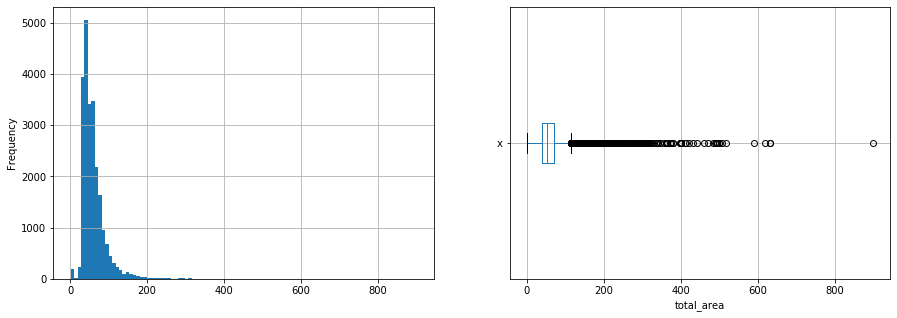

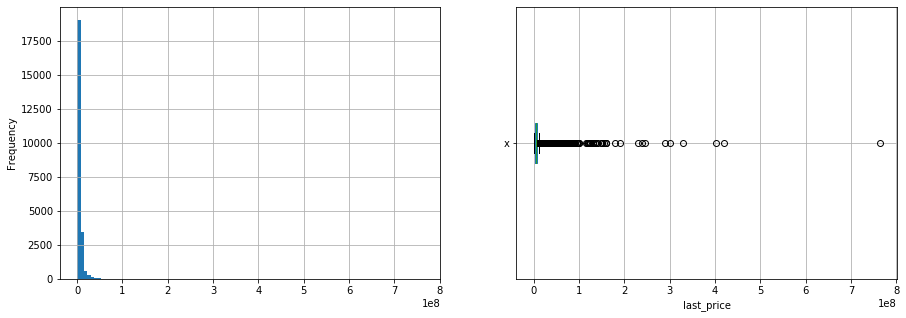

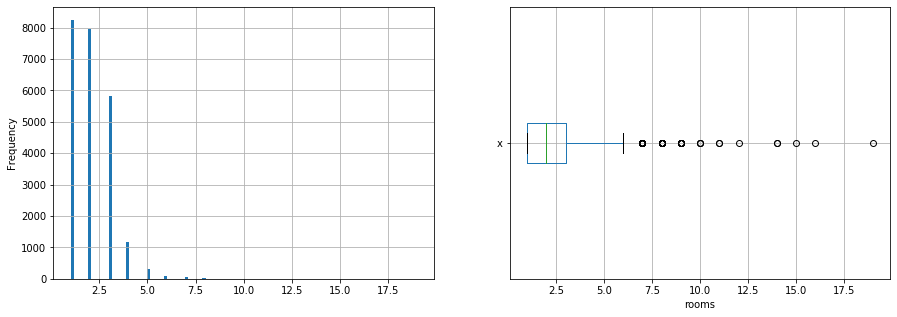

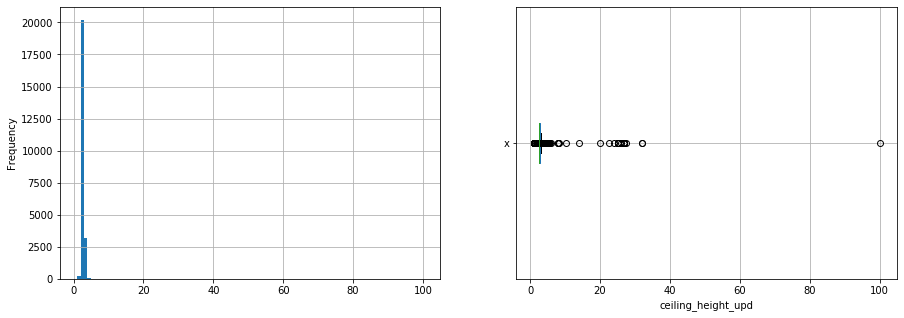

In [78]:
# создаем список с колонками, для которых необходимо построить гистограммы и копию df

basic_data_new = basic_data_1.copy()
columns = ['total_area','last_price','rooms','ceiling_height_upd']
# для каждого из показателей посторим гистограмму и коробку с усами
for col in columns:
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    basic_data_new[col].plot(ax=axes[0], kind= 'hist', grid=True, bins=100, label=col)
    pd.plotting.boxplot(basic_data_1[col], ax=axes[1], vert=False)
    plt.xlabel(col)

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Классные визуализации, супер!)

In [79]:
#Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
#Косвенно оценку времени на продажу квартиры мы можем оценить по параметру days_exposition, сделав допущение, что объявление закрывается сразу, после продажи


basic_data_1['days_exposition'].describe()

# среднее mean 155.774083
# медиана 73.000000
# продажа обычно занимает 73 дня (определяем по медиане).
# продажи прошли очень быстро, если количестов дней, необходимых для продажи меньше 1 квартиля 21 (то есть, быстрее, чем 25%)
# продажи прошли очень медленно, если количество дней, необходимых для продажи больше 197 (3 квартиль, то есть, дольше, чем 75%)

count    23699.000000
mean       155.774083
std        213.488209
min          0.000000
25%         21.000000
50%         73.000000
75%        197.000000
max       1580.000000
Name: days_exposition, dtype: float64

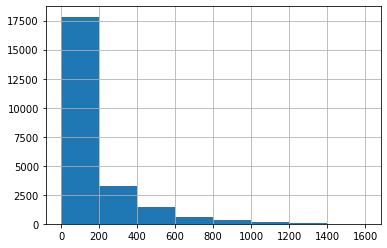

In [80]:
#гистограмма

basic_data_1['days_exposition'].hist(bins= 8, range = (0, 1600))

In [81]:
#Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
#работаем по логике - определяем параметры, влияющие на стоимость жилья. По ним проведем чистку  (+ проверим стоимость М2)и дальше будем их анализировать
#пусть это будут:(1) общая площадь,(2)число комнат, (3)удалённости от центра, (4) стоимость М2, (5.6.7)даты размещения: день недели, месяц и год.


In [82]:
basic_data_2 = basic_data_1.copy()
#делаем копию нашего 
#основного рабочего дата фрейма (чтобы оставить его без измнений)

In [83]:
# пишем общую функцию, которую потом будем применять к каждому из параметров

def clean_data (KPI):
    data_clean_data = [basic_data_2[KPI].min(), basic_data_2[KPI].max(), basic_data_2[KPI].mean(), basic_data_2[KPI].median()]
    #находим значения минимальное, максимальное, медиану и среднее
    columns_clean_data =['min','max','mean','median'] 
    clean_data= pd.DataFrame(data = data_clean_data, index = columns_clean_data)
    #формируем дата фрейм по найденым значениям
    histo_argument = basic_data_2[KPI].describe().T
    #находим квартили 
    q1 = histo_argument['25%']
    q3 = histo_argument['75%']
    iqr = q3 - q1
    #iqr = интерквартильный размах.Интервал значений признака, содержащий центральные 50% наблюдений выборки, т.е. интервал между 25-м и 75-м процентилями.
    query_data = basic_data_2.query('{} <= (@q3 + 3*@iqr)'.format(KPI))
    query_data[KPI].plot(kind= 'hist', bins = 50)
    plt.show()
    query_data.boxplot(column = KPI, figsize = (15,5), vert = False, widths = 0.75, showmeans = True)
    plt.show()

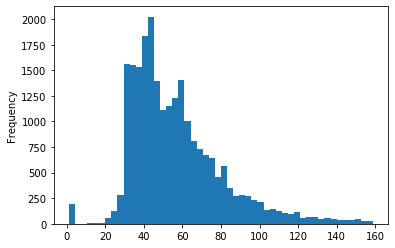

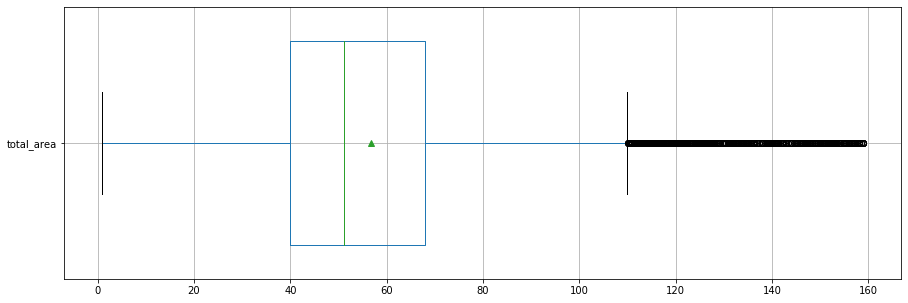

In [84]:
#(1) общая площадь
clean_data('total_area')
#видим,что большая часть значений лежит в промежутке от 40 до 70 метров, при этом, наблюдаем выбросы - квартиры с очень большой площадью (свыше 120 м) и очень маленькой (около 0)

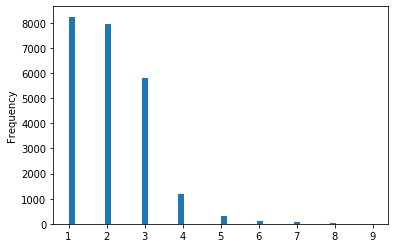

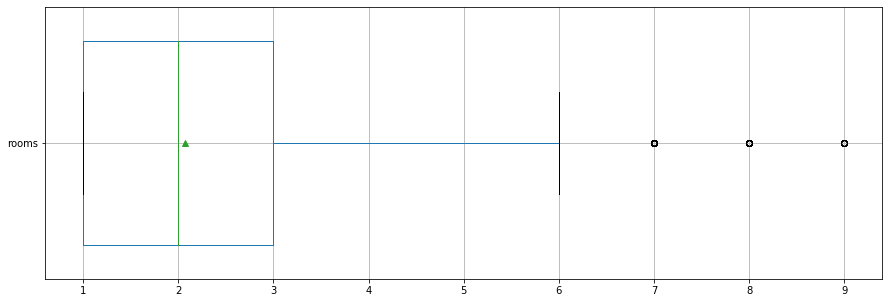

In [85]:
#(2)число комнат
clean_data('rooms')
#видим,что большая часть значений-1 и 2-х комнатные квартиры, далее трешки, 4-5 комнатных значительно меньше,при этом, наблюдаем выбросы - квартиры с большим числом комнат - более 6

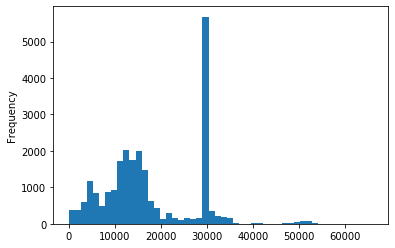

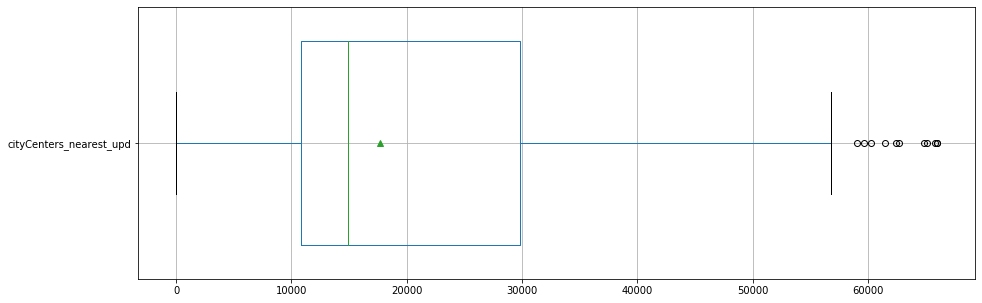

In [86]:
#(3)удалённости от центра
clean_data('cityCenters_nearest_upd')
#видим,что большая часть значений лежит в промежутке удаленности от центра 11-30-км,при этом, наблюдаем выбросы - наблюдаем выбросы - удаленность свыше 60 км

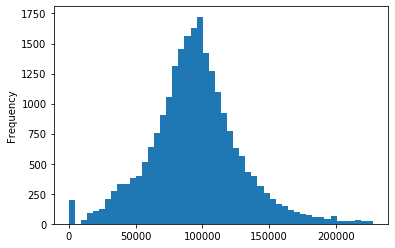

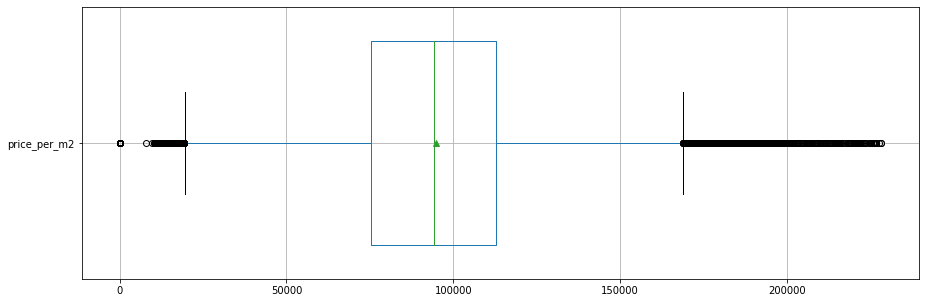

In [87]:
#(4)стоимость М2
clean_data('price_per_m2')
#видим,что большая часть значений лежит в промежутке от 80 до 110,при этом, наблюдаем выбросы - очень низкая или нулевая цена, что подозрительно и слишком высокая, свыше 1.6 млн.

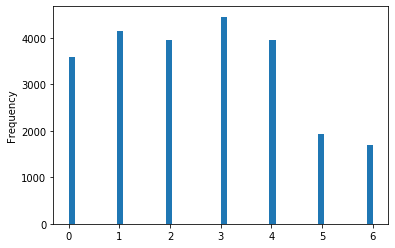

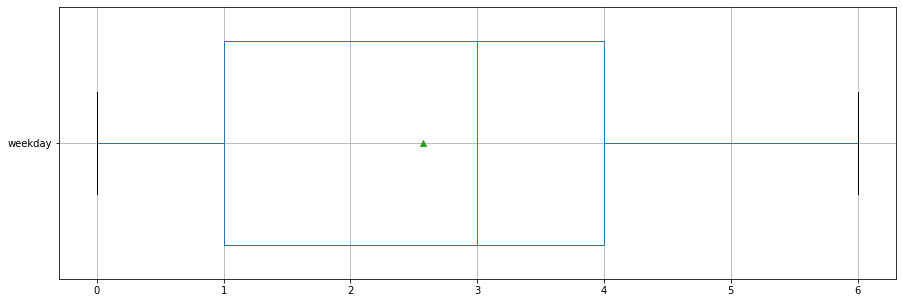

In [88]:
#(5)даты размещения:день недели
clean_data('weekday')
#основные дни размещения объявления понедельник-пятница, максимально "популярный" четверг

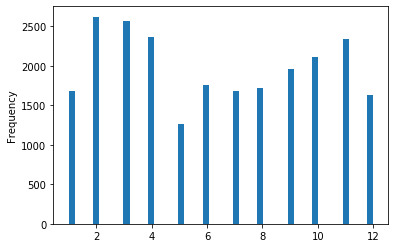

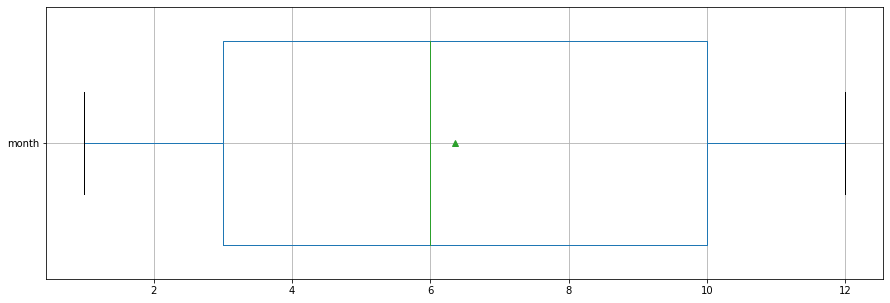

In [89]:
#(5.6.7)даты размещения:месяц
clean_data('month')
#основные месяцы размещения объявления февраль-апрель (со спадом в летние месяцы) и далее, наирают сезонность с сентября, достигая осеннего пика в ноябре, снижаясь в декабре, максимально "популярный" февраль

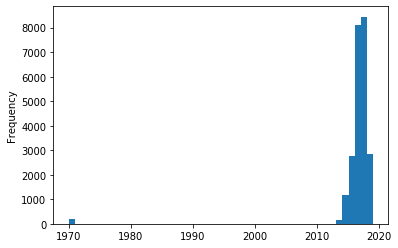

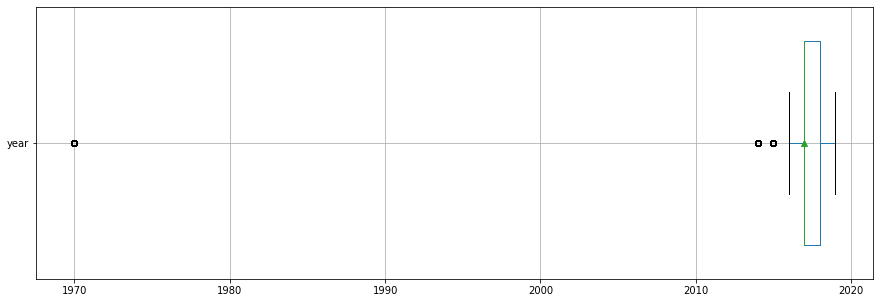

In [90]:
#(5.6.7)даты размещения:год
clean_data('year')
#основные годы размещения 2019, далее 2018
#выброс 1970 год (видимо, ошибка или у кого-то хорошее чувство юмора :))

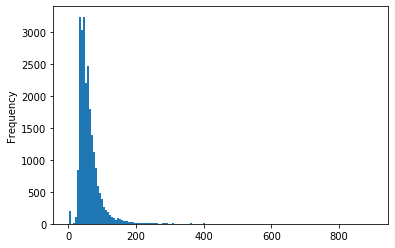

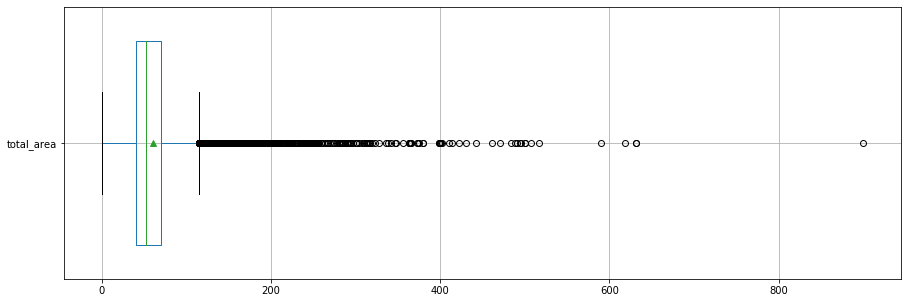

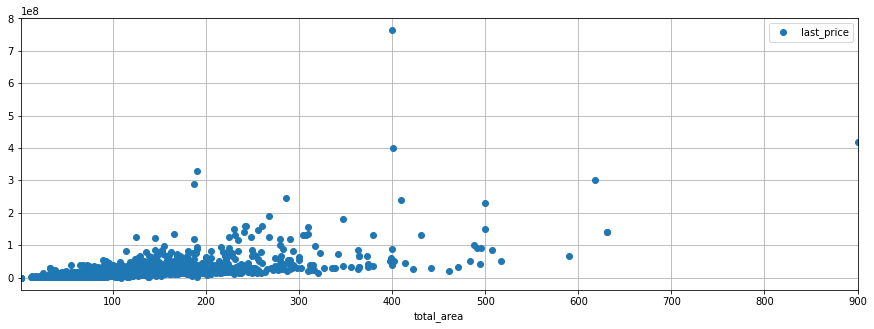

In [91]:
#Изучите, зависит ли цена от квадратного метра
basic_data_2['total_area'].plot(kind= 'hist', bins = 150)
plt.show()
basic_data_2.boxplot(column = 'total_area', figsize = (15,5), vert = False, widths = 0.75, showmeans = True)
plt.show()
basic_data_2.plot(x='total_area', y='last_price', style='o', grid=True, figsize=(15, 5))
plt.show()

#отсуствует прямая зависимость площадь-цена. Мы не видим на графике такой явной закономерности
#в большей степени она действует для квартир с площадью до 100м2

In [92]:
#Изучите, зависит ли цена от числа комнат

mean_rooms=basic_data_2.pivot_table(index = 'rooms', values = 'last_price', aggfunc ='mean').sort_values(by = 'last_price')

mean_rooms.style.format('{:2f}')

#однозначную зависимость категории - чем больше комнат, тнм больше цена подтвердить в полной мере нельзя. Однако, такая закономерность наблюдается для квартир с количеством комнат от 1 до 

,last_price
rooms,
1,3743711.107593
2,5591604.784131
3,8179118.539216
4,13423497.184746
5,23762082.092025
11,25250000.000000
10,26166666.666667
14,26829500.000000
16,28500000.000000


In [93]:
#Изучите, зависит ли цена от удалённости от центра
mean_cityCenters_nearest=basic_data_2.pivot_table(index = 'locality_type', values = 'last_price', aggfunc ='mean').sort_values(by = 'last_price')

mean_cityCenters_nearest.style.format('{:2f}')

#видим прямую зависимость цены от удаленности от центра. Чем квартира ближе к центру, тем она дороже.

,last_price
locality_type,
Область,3563163.372438
Перифирия,5783537.285293
Жилой район,11276417.062626
Центр,15010672.186013


In [94]:
#Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

mean_floor_type=basic_data_2.pivot_table(index = 'floor_type', values = 'last_price', aggfunc ='mean').sort_values(by = 'last_price')

mean_floor_type.style.format('{:2f}')
#видим прямую зависимость цены от этажности. Самый дорогой-последний этаж, дешевый 1.

,last_price
floor_type,
первый,4510965.564276
другой,6707016.958907
последний,7374690.069474


In [95]:
#Также изучите зависимость от даты размещения: дня недели

mean_weekday=basic_data_2.pivot_table(index = 'weekday', values = 'last_price', aggfunc ='mean').sort_values(by = 'last_price')

mean_weekday.style.format('{:2f}')

#прямая зависимость отсутствует

,last_price
weekday,
6,6269467.017773
4,6414308.839241
1,6424563.646577
3,6425821.458689
0,6533852.112503
2,6654425.834432
5,7002825.069127


In [96]:
#Также изучите зависимость от даты размещения: месяца
mean_month=basic_data_2.pivot_table(index = 'month', values = 'last_price', aggfunc ='mean').sort_values(by = 'last_price')

mean_month.style.format('{:2f}')

#прямая зависимость от порядкового номера месяца отсутствует

,last_price
month,
1,5919115.658754
10,6259981.218380
6,6318299.621868
3,6383525.925292
8,6393822.580383
2,6492734.661709
11,6502932.923077
5,6621212.090837
7,6638658.306317


In [97]:
#Также изучите зависимость от даты размещения: года.

mean_year=basic_data_2.pivot_table(index = 'year', values = 'last_price', aggfunc ='mean').sort_values(by = 'last_price')

mean_year.style.format('{:2f}')
#какой-либо логичной закономерности зависимости от года продажи установить нельзя

,last_price
year,
1970,1.000000
2018,5970040.515690
2017,6628314.252997
2019,6804000.066038
2016,6834080.474271
2015,8588429.680135
2014,12087135.941606


In [98]:
#Какие факторы больше всего влияют на стоимость квартиры?
#можно выделить две группы факторов: факторы инфраструктуры. В данной группе факторов основной и сильновлияющий фактор - удаленность от центра
#вторая группа факторов - факторы, описывающий качественные параметры квартиры. Из них основные влияющие: площадь, этажность. Для кавртир с количеством комнат до 3- сохраняется прямое воияние на цену количества комнатю далее, эта зивисимость работает очень выборочно
# не влияют на цену период размещения обьявления 
# самый влящий фактор, при прочих равных - местоположение

In [99]:
basic_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 36 columns):
total_images               23699 non-null int64
last_price                 23699 non-null float64
total_area                 23699 non-null float64
first_day_exposition       23699 non-null datetime64[ns]
rooms                      23699 non-null int64
ceiling_height             14619 non-null float64
floors_total               23699 non-null int64
living_area                21810 non-null float64
floor                      23699 non-null int64
is_apartment               23699 non-null object
studio                     23699 non-null object
open_plan                  23699 non-null object
kitchen_area               21618 non-null float64
balcony                    23699 non-null int64
locality_name              23650 non-null object
airports_nearest           18236 non-null float64
cityCenters_nearest        18259 non-null float64
parks_around3000           23699 non-null float6

In [100]:
basic_data_4 = basic_data_1.copy() #копия основного рабочего дата фрейма, мы не хоитм его менять

#10 населенных пукнтов с наибольшим числов объявлений
top_10_городов = basic_data_4['locality_name'].value_counts().sort_values(ascending=False).head(10)
top_10_городов



Санкт-Петербург      15611
посёлок Мурино         495
посёлок Шушары         436
Всеволожск             392
Пушкин                 369
Колпино                338
посёлок Парголово      323
Гатчина                307
деревня Кудрово        283
Выборг                 237
Name: locality_name, dtype: int64

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

У тебя отлично получается анализировать сложные данные и находить скрытые зависимости, здорово!)

In [101]:
#Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
#копия основного рабочего дата фрейма, мы не хоитм его менять

top_10 =['Санкт-Петербург','посёлок Мурино','посёлок Шушары','Всеволожск','Пушкин','Колпино','посёлок Парголово','Гатчина','деревня Кудрово','Выборг']


basic_data_5 = (basic_data_5
                  .query('locality_name.isin(@top_10)')
                  .groupby('locality_name') 
                  .agg({'price_per_m2':'mean'})
                  .reset_index().rename(columns = {'price_per_m2': 'price_per_m2_mean'}) 
)
top_10 = basic_data_5[['locality_name', 'price_per_m2_mean']].sort_values(by = 'price_per_m2_mean', ascending = False)
top_10.head(10)
    

NameError: name 'basic_data_5' is not defined

In [102]:
#Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
#Выделите квартиры в Санкт-Петербурге ('locality_name'). 
basic_data_6 = basic_data_1.copy()
basic_data_6 = basic_data_6[basic_data_6['locality_name'] == 'Санкт-Петербург']
basic_data_6.info() #выборка проведена успешно

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15611 entries, 0 to 23697
Data columns (total 36 columns):
total_images               15611 non-null int64
last_price                 15611 non-null float64
total_area                 15611 non-null float64
first_day_exposition       15611 non-null datetime64[ns]
rooms                      15611 non-null int64
ceiling_height             10048 non-null float64
floors_total               15611 non-null int64
living_area                14478 non-null float64
floor                      15611 non-null int64
is_apartment               15611 non-null object
studio                     15611 non-null object
open_plan                  15611 non-null object
kitchen_area               14342 non-null float64
balcony                    15611 non-null int64
locality_name              15611 non-null object
airports_nearest           15526 non-null float64
cityCenters_nearest        15550 non-null float64
parks_around3000           15611 non-null float6

In [103]:
#Ваша задача — выяснить, какая область входит в центр. 
#Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. 
#После этого посчитайте среднюю цену для каждого километра. 


basic_data_6['cityCenters_nearest_upd_km'] = basic_data_6['cityCenters_nearest_upd'] / 1000

basic_data_6['cityCenters_nearest_upd_km'] = basic_data_6['cityCenters_nearest_upd_km'].round(0)


pivot_center=basic_data_6.pivot_table(index = 'cityCenters_nearest_upd_km', values = 'price_per_m2', aggfunc ='mean').sort_values(by = 'cityCenters_nearest_upd_km', ascending = True)


pivot_center

,price_per_m2
cityCenters_nearest_upd_km,
0.0,245833.530289
1.0,177327.462388
2.0,158007.626791
3.0,121343.968251
4.0,133339.169054
5.0,140438.067713
6.0,150950.512282
7.0,156275.146563
8.0,125662.925827


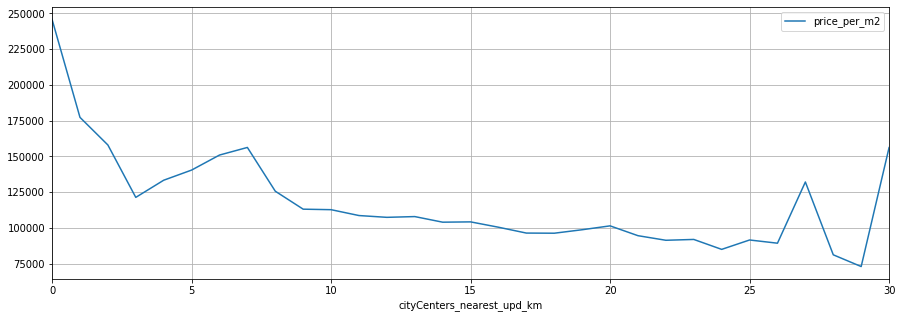

In [104]:
#Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
#Определите границу, где график сильно меняется — это и будет центральная зона.

pivot_center.plot(y = 'price_per_m2', grid = True, figsize=(15,5))

# видим ценовой пик на расстоянии от 3 до 0 и от 7 до 9
# наш диапазон от 0 до 9

In [105]:
basic_data_6 = basic_data_6[basic_data_6['cityCenters_nearest_upd_km'] <= 9]

basic_data_6.info()

#выделите сегмент квартир в центре. 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4690 entries, 3 to 23694
Data columns (total 37 columns):
total_images                  4690 non-null int64
last_price                    4690 non-null float64
total_area                    4690 non-null float64
first_day_exposition          4690 non-null datetime64[ns]
rooms                         4690 non-null int64
ceiling_height                3061 non-null float64
floors_total                  4690 non-null int64
living_area                   4313 non-null float64
floor                         4690 non-null int64
is_apartment                  4690 non-null object
studio                        4690 non-null object
open_plan                     4690 non-null object
kitchen_area                  4275 non-null float64
balcony                       4690 non-null int64
locality_name                 4690 non-null object
airports_nearest              4684 non-null float64
cityCenters_nearest           4690 non-null float64
parks_around300

In [106]:
#Проанализируйте эту территорию и изучите следующие параметры: 
#площадь, 

basic_data_6['total_area'].describe()
#по показателям - чаще всего продают 2-3-х комнатные квартиры (по площади), при этом, в разных домах, так как разная площадь у квартир (исходя из отличия среднего и медианы - размах внутри данных заметный)

count    4690.000000
mean       86.642399
std        56.698334
min        12.000000
25%        51.400000
50%        73.000000
75%       102.000000
max       900.000000
Name: total_area, dtype: float64

In [107]:
#Проанализируйте эту территорию и изучите следующие параметры: 
#цена

(basic_data_6['last_price'] / 1000000).describe()
# в среднем цена колеблется в пределах 8 миллионов, доходя до 13 (25%), свыше 13 - 25%, ниже 8 (до 6) 25%, остальные ниже 6

count    4690.000000
mean       13.302568
std        22.278253
min         0.012190
25%         5.990000
50%         8.500000
75%        13.137500
max       763.000000
Name: last_price, dtype: float64

In [108]:
#Проанализируйте эту территорию и изучите следующие параметры: 
#число комнат

basic_data_6['rooms'].describe()

count    4690.000000
mean        2.685288
std         1.383839
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

In [109]:
#Проанализируйте эту территорию и изучите следующие параметры: 
#,высота потолков

basic_data_6['ceiling_height_upd'].describe()
#средняя высота потолков 3 метра, что в среднем, выше стандартной высоты

count    4690.000000
mean        3.029770
std         1.614021
min         2.000000
25%         2.800000
50%         3.000000
75%         3.100000
max       100.000000
Name: ceiling_height_upd, dtype: float64

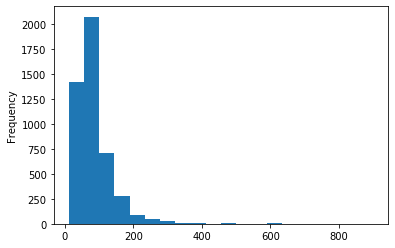

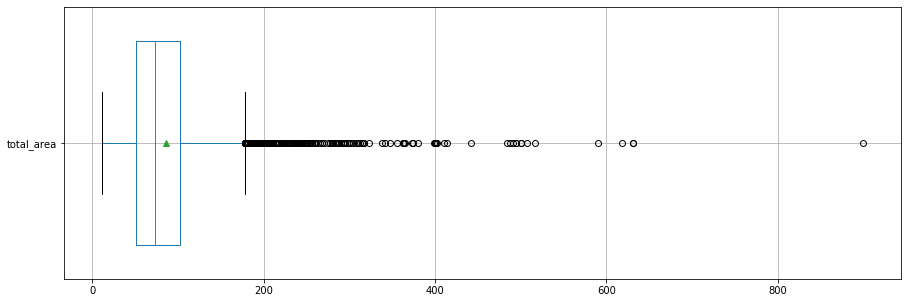

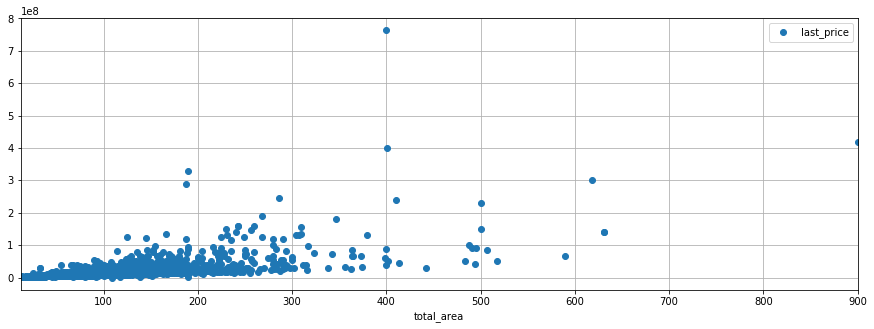

In [110]:
#зависит ли цена от квадратного метра
basic_data_6['total_area'].plot(kind= 'hist', bins = 20)
plt.show()
basic_data_6.boxplot(column = 'total_area', figsize = (15,5), vert = False, widths = 0.75, showmeans = True)
plt.show()
basic_data_6.plot(x='total_area', y='last_price', style='o', grid=True, figsize=(15, 5))
plt.show()

#отсуствует прямая зависимость площадь-цена. Мы не видим на графике такой явной закономерности
#видим пик цены на метраже 150 с последующим незначительным снижением

In [111]:
#проверка на зависимость от числа комнат
mean_rooms=basic_data_6.pivot_table(index = 'rooms', values = 'last_price', aggfunc ='mean').sort_values(by = 'last_price')

mean_rooms.style.format('{:2f}')

#однозначную зависимость категории - чем больше комнат, тнм больше цена подтвердить в полной мере нельзя. Однако, такая закономерность наблюдается для квартир с количеством комнат от 1 до 4
#по сравнению с генеральной совокупностью, в выборке зависимость прослеживается четче

,last_price
rooms,
1,5982967.367299
2,8988377.054258
3,13800229.813808
4,19056552.023009
11,25250000.000000
14,26829500.000000
10,27750000.000000
5,28406633.312775
16,28500000.000000


In [112]:
#зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

mean_floor_type=basic_data_6.pivot_table(index = 'floor_type', values = 'last_price', aggfunc ='mean').sort_values(by = 'last_price')

mean_floor_type.style.format('{:2f}')
#видим прямую зависимость цены от этажности. Самый дорогой-последний этаж, дешевый 1. Зависимость аналогична генеральнйо совокупности

,last_price
floor_type,
первый,8611281.341564
другой,13131448.040363
последний,16952280.508280


In [113]:
#удалённость от центра

#Изучите, зависит ли цена от удалённости от центра
mean_cityCenters_nearest=basic_data_6.pivot_table(index = 'cityCenters_nearest_upd_km', values = 'last_price', aggfunc ='mean').sort_values(by = 'last_price')

mean_cityCenters_nearest.style.format('{:2f}')

#видим прямую зависимость цены от удаленности от центра. Чем квартира ближе к центру, тем она дороже.

,last_price
cityCenters_nearest_upd_km,
9.0,6963401.923858
8.0,10017490.600677
3.0,11149579.802292
4.0,13320477.898108
5.0,14530612.187568
7.0,14830225.086124
6.0,15328418.270049
2.0,17886620.389610
1.0,21274818.842932


In [114]:
#дата размещения объявления). дата

mean_weekday=basic_data_6.pivot_table(index = 'weekday', values = 'last_price', aggfunc ='mean').sort_values(by = 'last_price')

mean_weekday.style.format('{:2f}')
#четкая закономерность отсуствует

,last_price
weekday,
1,12453043.728834
4,12892564.533163
0,13104759.951724
3,13212514.412393
6,13230699.570934
2,13445284.251580
5,16586531.640000


In [115]:
#дата размещения объявления). месяц 
mean_weekday=basic_data_6.pivot_table(index = 'month', values = 'last_price', aggfunc ='mean').sort_values(by = 'last_price')

mean_weekday.style.format('{:2f}')
#четкая закономерность отсуствует

,last_price
month,
10,12066241.537500
8,12648751.108571
3,12821539.742633
6,12881350.271978
11,12886663.081678
5,13097333.759124
2,13210324.726733
7,13372526.612022
1,13775259.837838


In [116]:
#дата размещения объявления). год
mean_weekday=basic_data_6.pivot_table(index = 'year', values = 'last_price', aggfunc ='mean').sort_values(by = 'last_price')

mean_weekday.style.format('{:2f}')
#четкая закономерность c 2014 по 2017 год (каждый год цена растет, что закономерно), а вто в 2019 произошло снижение цены.
#оценочно - в связи со снижением покупательского спроса на ткие квартиры или измнение качественных характеристик квартир.

,last_price
year,
2018,11465435.601231
2019,13313249.429644
2017,13817950.763526
2016,14176804.926984
2015,15802096.698163
2014,21746154.717949


#Сделайте выводы. Отличаются ли они от общих выводов по всему городу? 
В целом, зависимости генеральной совокупности и вборки идентичны.
Больше всего цена чувтсвительна к местоположению.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Просто класс! Очень здорово и детально, работа проделана колоссальная, продолжай в том же духе


### Шаг 5. Общий вывод

Проведено исследование о продаже квартир. Было выявлено много пропусков в данных, связанных, предположительно,с двумя причинами: пропуск в заполнении с данными, в случае, если показатель отсуствует (например, парк рядом), ошибки, возможно часть данных была скрыта намеренно (например - удаленность от города). Заполнение пропусков произведено по двус алгоритмам - там, где есть логически обоснованный способ - расчетными данными (чаще всего медианы по группам параметров или по параметру), где такой способ остустовал 0 (для категориальных данных условный показатель (прочие и т.д.)).
Были проанализированы оценочно выдвинутеы факторы, влияющие на цену по генеральной совокупности и выборке (квартиры в центре).
Тенденции зависимости стоимости совпали.
Основный фактором является местонахождение квартиры (удаление от центра).

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Точные и обоснованные выводы, супер)

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

#### Код

Всё отлично. Из того, что очень порадовало - соблюдена структура проекта, шаги из задания обозначены и выполнены последовательно, код написан аккуратно, используются комментарии к коду, быстро можно понять, какие операции выполняют сложные конструкции. В качестве совета предлагаю глубже изучить библиотеку Seaborn для построения более ярких и качественных визуализаций в Python, так как иногда хорошая красочная визуализация может сказать очень многое о данных.

#### Выводы

Ты пишешь отличные обоснованные выводы по проделанной раблоте и выдвигаешь корректные гипотезы - это очень радует!) Так же видно глубокое понимание проведённого анализа. Было очень интересно проверять твой проект и следить за твоей мыслью, продолжай в том же духе) Удачи!)